In [ ]:
import pandas as pd
import numpy as np

import sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt
from six import StringIO
import pydotplus
from IPython.display import Image  

from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

dataset_hotels_test = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_test.csv?raw=true')
dataset_hotels_train = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_train.csv?raw=true')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))
  
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [ ]:
dataset_hotels_test_id = dataset_hotels_test['id'].copy()

#Preprocesamiento

In [ ]:
dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna(0).astype('int').astype('str')
dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna(0).astype('int').astype('str')

In [ ]:
dataset_hotels_train.drop(['meal', 'is_repeated_guest','id','previous_bookings_not_canceled'], axis='columns', inplace=True)
dataset_hotels_test.drop(['meal', 'is_repeated_guest','id','previous_bookings_not_canceled'], axis='columns', inplace=True)

In [ ]:
dataset_hotels_train['cant_personas'] = dataset_hotels_train['children'].fillna(0) + dataset_hotels_train['adults'].fillna(0) + dataset_hotels_train['babies'].fillna(0)
dataset_hotels_train.drop(['children', 'adults','babies'], axis='columns', inplace=True) 
dataset_hotels_test['cant_personas'] = dataset_hotels_test['children'].fillna(0) + dataset_hotels_test['adults'].fillna(0) + dataset_hotels_test['babies'].fillna(0)
dataset_hotels_test.drop(['children', 'adults','babies'], axis='columns', inplace=True) 

In [ ]:
dataset_hotels_train['company'] = dataset_hotels_train['company'].fillna('ninguno')
dataset_hotels_test['company'] = dataset_hotels_test['company'].fillna('ninguno')

In [ ]:
dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna('desconocida')
dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna('desconocida')

In [ ]:
# dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna(0).astype('int').astype('str')
# dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna(0).astype('int').astype('str')

In [ ]:
# dataset_hotels_train.drop(['meal', 'is_repeated_guest','stays_in_weekend_nights','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','id','previous_bookings_not_canceled'], axis='columns', inplace=True)
# dataset_hotels_test.drop(['meal', 'is_repeated_guest','stays_in_weekend_nights','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','id','previous_bookings_not_canceled'], axis='columns', inplace=True)

In [ ]:
dataset_hotels_train['hotel'] = pd.Categorical(dataset_hotels_train['hotel']).codes
dataset_hotels_train['country'] = pd.Categorical(dataset_hotels_train['country']).codes
dataset_hotels_train['market_segment'] = pd.Categorical(dataset_hotels_train['market_segment']).codes
dataset_hotels_train['distribution_channel'] = pd.Categorical(dataset_hotels_train['distribution_channel']).codes
dataset_hotels_train['reserved_room_type'] = pd.Categorical(dataset_hotels_train['reserved_room_type']).codes
dataset_hotels_train['assigned_room_type'] = pd.Categorical(dataset_hotels_train['assigned_room_type']).codes
dataset_hotels_train['deposit_type'] = pd.Categorical(dataset_hotels_train['deposit_type']).codes
dataset_hotels_train['agent'] = pd.Categorical(dataset_hotels_train['agent']).codes
dataset_hotels_train['company'] = pd.Categorical(dataset_hotels_train['company']).codes
dataset_hotels_train['customer_type'] = pd.Categorical(dataset_hotels_train['customer_type']).codes
dataset_hotels_train['reservation_status_date'] = pd.Categorical(dataset_hotels_train['reservation_status_date']).codes
dataset_hotels_train['arrival_date_month'] = pd.Categorical(dataset_hotels_train['arrival_date_month']).codes

In [ ]:
dataset_hotels_test['hotel'] = pd.Categorical(dataset_hotels_test['hotel']).codes
dataset_hotels_test['country'] = pd.Categorical(dataset_hotels_test['country']).codes
dataset_hotels_test['market_segment'] = pd.Categorical(dataset_hotels_test['market_segment']).codes
dataset_hotels_test['distribution_channel'] = pd.Categorical(dataset_hotels_test['distribution_channel']).codes
dataset_hotels_test['reserved_room_type'] = pd.Categorical(dataset_hotels_test['reserved_room_type']).codes
dataset_hotels_test['assigned_room_type'] = pd.Categorical(dataset_hotels_test['assigned_room_type']).codes
dataset_hotels_test['deposit_type'] = pd.Categorical(dataset_hotels_test['deposit_type']).codes
dataset_hotels_test['agent'] = pd.Categorical(dataset_hotels_test['agent']).codes
dataset_hotels_test['company'] = pd.Categorical(dataset_hotels_test['company']).codes
dataset_hotels_test['customer_type'] = pd.Categorical(dataset_hotels_test['customer_type']).codes
dataset_hotels_test['reservation_status_date'] = pd.Categorical(dataset_hotels_test['reservation_status_date']).codes
dataset_hotels_test['arrival_date_month'] = pd.Categorical(dataset_hotels_test['arrival_date_month']).codes

##Busqueda de hiperparametros y entrenamiento

In [73]:
#Separo un set de Evaluacion
x_train, x_test, y_train, y_test = train_test_split(dataset_hotels_train.drop(['is_canceled'], axis='columns', inplace=False).values, 
                                                    dataset_hotels_train['is_canceled'].values, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=dataset_hotels_train['is_canceled'].values) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 49530
# Datos Prueba: 12383
% Positivos Entrenamiento: 49.976
% Positivos Prueba: 49.972


In [ ]:
#Creo el modelo y lo entreno

import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=0, n_estimators=100)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

AUC: 0.9928571167710892
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6195
           1       0.99      0.95      0.97      6188

    accuracy                           0.97     12383
   macro avg       0.97      0.97      0.97     12383
weighted avg       0.97      0.97      0.97     12383



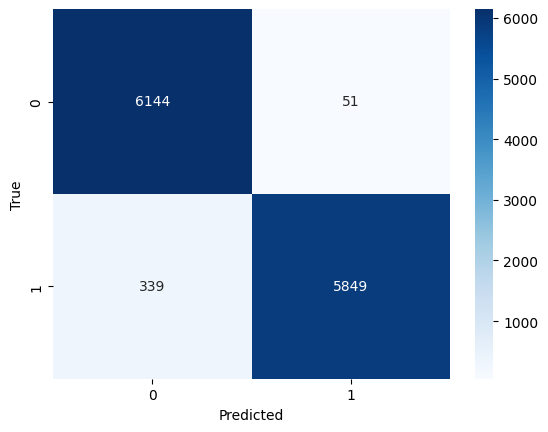

In [ ]:
#Evaluo en el set de test
y_pred_proba= xgb_model.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, y_pred_proba))

#Matriz de Confusion
y_pred=xgb_model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))

In [ ]:
##CON CROSS VALIDATION

In [ ]:
from xgboost import XGBClassifier

In [ ]:
cv_params = {'learning_rate': [0.1, 0.2, 0.3],
             'max_depth': [2,3,4,5],
             'min_child_weight': [1,2,3,4],
             'n_estimators': [50,75,100,125]
            }
xbg_cv = GridSearchCV(XGBClassifier(random_state=0), cv_params, scoring='f1', cv=5)
xbg_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3, 4],
                         'n_estimators': [50, 75, 100, 125]},
             scoring='f1')

In [ ]:
#Mejores hiperparametros del arbol
print(xbg_cv.best_params_)
#Mejor métrica
print(xbg_cv.best_score_)
print(xbg_cv.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 125}
0.9635911434737394
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)


In [ ]:
y_predict_train = xbg_cv.predict(x_test)

F1-Score: 0.962594343534876


Text(50.722222222222214, 0.5, 'True')

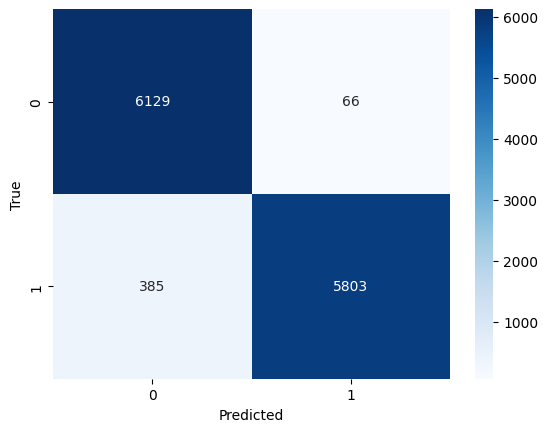

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report , f1_score
print('F1-Score: {}'.format(f1_score(y_test, y_predict_train, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_predict_train)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
y_pred = xbg_cv.predict(dataset_hotels_test)

In [ ]:
xbg_cv.best_params_

{'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 125}

In [ ]:
from joblib import dump, load
dump(xbg_cv, 'xgb_cv.joblib')

['xgb_cv.joblib']

In [ ]:
df_prediction = pd.DataFrame(zip(dataset_hotels_test_id,y_pred)).rename(columns={0: "id", 1: "is_canceled"})
df_prediction

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,1
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...,...
26530,636ccded-66ad-4538-8006-c0b9f84c6256,0
26531,11e19741-bd28-4459-8ea3-184f1664000f,0
26532,36a4c7b0-d6b1-4528-93db-311be96ec1c6,1
26533,89c85fa5-2b3d-4131-844c-e151a65ca240,1


In [ ]:
df_prediction.to_csv('xgboost_cv_prediction.csv', index=False)

## 